In [60]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# (8)-A

In [61]:
df = pd.read_csv('College.csv')

In [62]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# (B)

In [63]:
df.loc[:,'Unnamed: 0']

0        Abilene Christian University
1                  Adelphi University
2                      Adrian College
3                 Agnes Scott College
4           Alaska Pacific University
                    ...              
772           Worcester State College
773                 Xavier University
774    Xavier University of Louisiana
775                   Yale University
776      York College of Pennsylvania
Name: Unnamed: 0, Length: 777, dtype: object

In [64]:
df.rename(columns={'Unnamed: 0':'college name'},inplace=True)
df = df.set_index('college name')

# (C)

In [65]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


# (D)

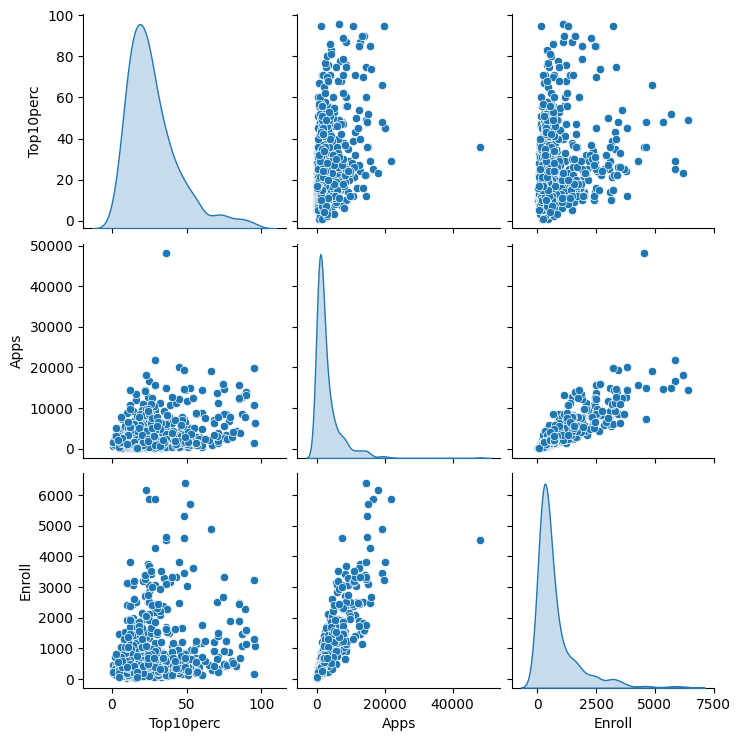

In [66]:
pairplot_df = df[['Top10perc', 'Apps', 'Enroll']]
sns.pairplot(pairplot_df, diag_kind='kde')

# (E)

<Axes: xlabel='Outstate', ylabel='Private'>

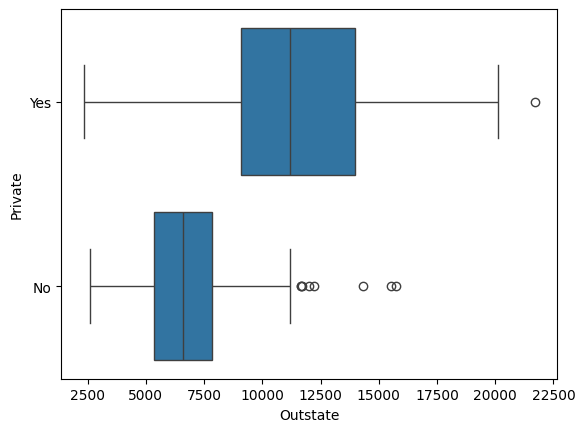

In [67]:
sns.boxplot(df,x='Outstate',y='Private')

# (f)

In [68]:
df['elite'] = pd.cut(df['Top10perc'],bins=[0,50,100],labels=['No','Yes'])

In [69]:
df['elite'].value_counts()

elite
No     699
Yes     78
Name: count, dtype: int64

<Axes: xlabel='Outstate', ylabel='elite'>

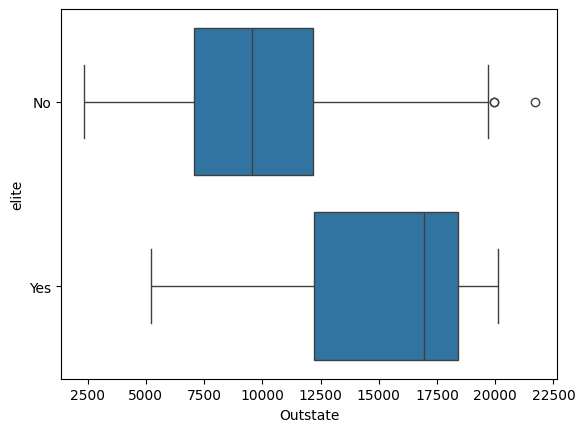

In [70]:
sns.boxplot(df,x='Outstate',y='elite')

# (g)

In [71]:
selected_cols = ['Apps', 'Accept', 'Enroll']

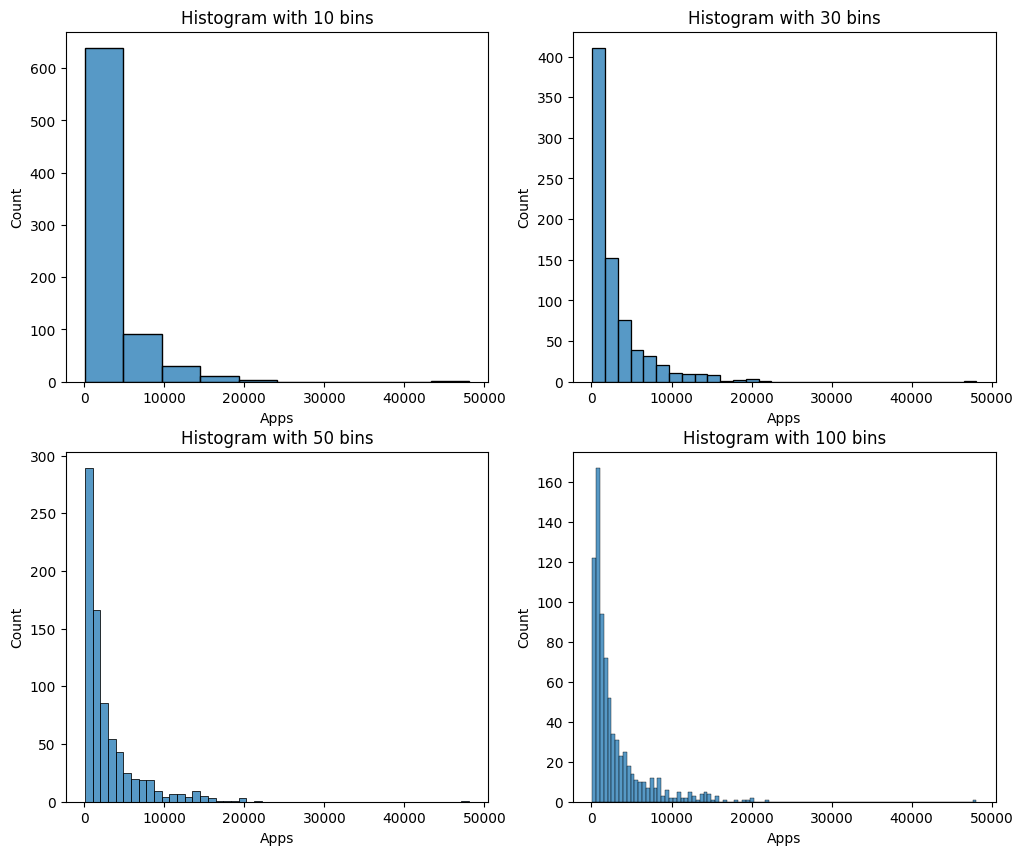

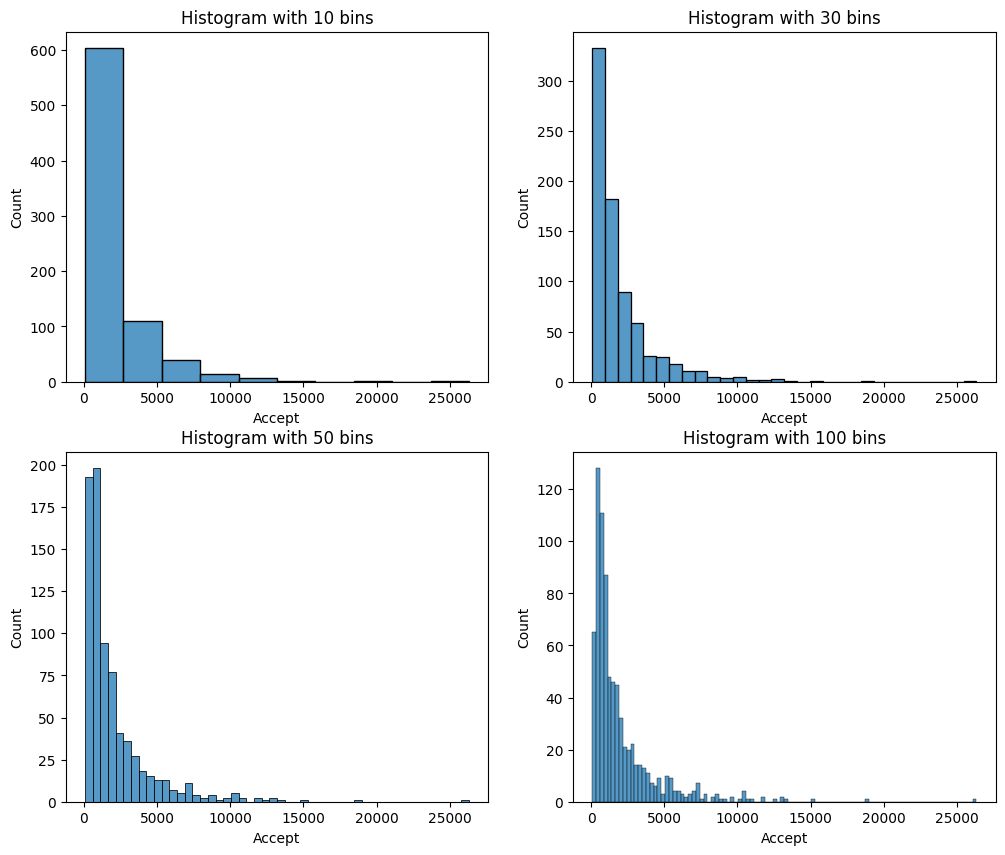

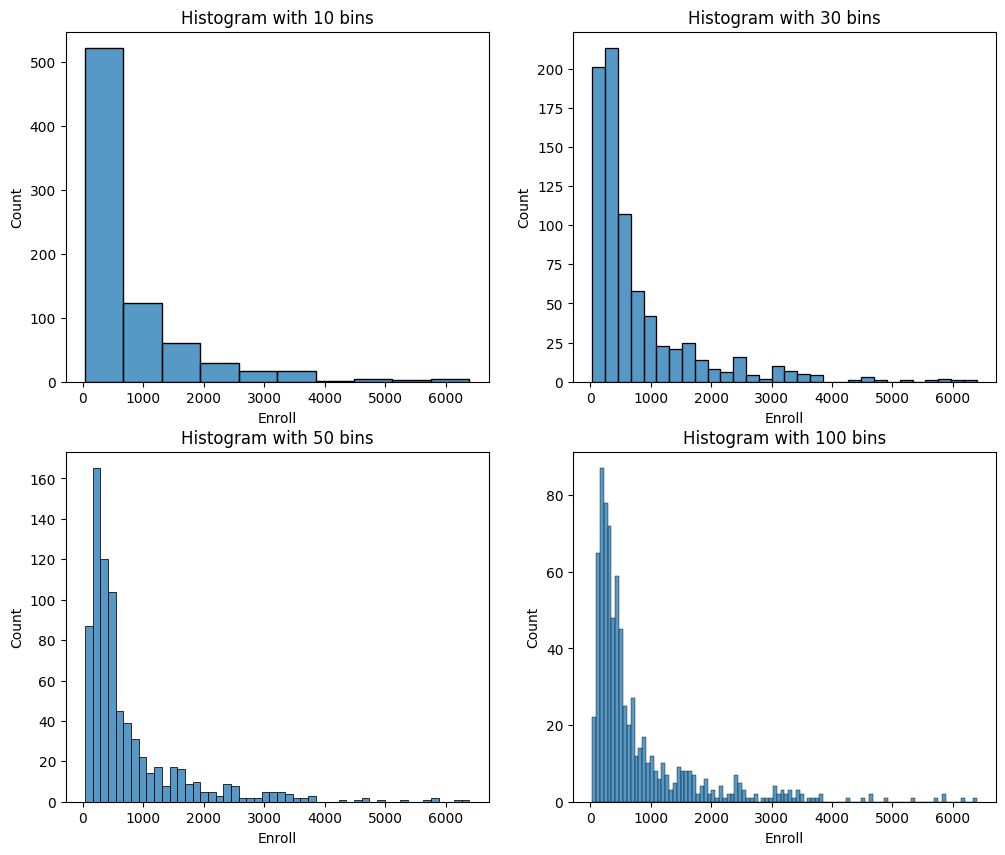

In [72]:
for cols in selected_cols:
 fig, ax = plt.subplots(2,2,figsize=(12,10))

 sns.histplot(df,x=cols,bins=10,ax=ax[0,0])
 sns.histplot(df,x=cols,bins=30,ax=ax[0,1])
 sns.histplot(df,x=cols,bins=50,ax=ax[1,0])
 sns.histplot(df,x=cols,bins=100,ax=ax[1,1])

 ax[0,0].set_title('Histogram with 10 bins')
 ax[0,1].set_title('Histogram with 30 bins')
 ax[1,0].set_title('Histogram with 50 bins')
 ax[1,1].set_title('Histogram with 100 bins')

# (9)-A

In [73]:
df = pd.read_csv('Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [74]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [76]:
df['cylinders'].value_counts()

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64

In [77]:
df['cylinders'] = df['cylinders'].astype('category')

In [78]:
df['origin'].value_counts()

origin
1    245
3     79
2     68
Name: count, dtype: int64

In [79]:
df['origin'] = df['origin'].astype('category')

In [80]:
df['year'] = df['year'].astype('category')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    category
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    int64   
 4   weight        392 non-null    int64   
 5   acceleration  392 non-null    float64 
 6   year          392 non-null    category
 7   origin        392 non-null    category
 8   name          392 non-null    object  
dtypes: category(3), float64(3), int64(2), object(1)
memory usage: 20.6+ KB


In [82]:
qualitative_cols = df.select_dtypes(include=['category','object'])
quantitative_cols = df.select_dtypes(include=['float',int])

In [123]:
quantitative_cols

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130,3504,12.0
1,15.0,350.0,165,3693,11.5
2,18.0,318.0,150,3436,11.0
3,16.0,304.0,150,3433,12.0
4,17.0,302.0,140,3449,10.5
...,...,...,...,...,...
387,27.0,140.0,86,2790,15.6
388,44.0,97.0,52,2130,24.6
389,32.0,135.0,84,2295,11.6
390,28.0,120.0,79,2625,18.6


In [83]:
print(f'qualitative_cols: {list(qualitative_cols.columns)}')
print(f'quantitative_cols:{list(quantitative_cols.columns)}')

qualitative_cols: ['cylinders', 'year', 'origin', 'name']
quantitative_cols:['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']


# (B)

In [84]:
for cols in quantitative_cols:
    print(f'Min range of {cols} : {quantitative_cols.describe()[cols]['min']}')
    print(f'Max range of {cols} : {quantitative_cols.describe()[cols]['max']}')
    print('------------------------------------------------')

Min range of mpg : 9.0
Max range of mpg : 46.6
------------------------------------------------
Min range of displacement : 68.0
Max range of displacement : 455.0
------------------------------------------------
Min range of horsepower : 46.0
Max range of horsepower : 230.0
------------------------------------------------
Min range of weight : 1613.0
Max range of weight : 5140.0
------------------------------------------------
Min range of acceleration : 8.0
Max range of acceleration : 24.8
------------------------------------------------


# (C)

In [85]:
for cols in quantitative_cols:
    print(f'Mean of {cols} : {quantitative_cols.describe()[cols]['mean']}')
    print(f'std of {cols} : {quantitative_cols.describe()[cols]['std']}')
    print('------------------------------------------------')

Mean of mpg : 23.445918367346938
std of mpg : 7.8050074865717995
------------------------------------------------
Mean of displacement : 194.41198979591837
std of displacement : 104.64400390890466
------------------------------------------------
Mean of horsepower : 104.46938775510205
std of horsepower : 38.49115993282849
------------------------------------------------
Mean of weight : 2977.5841836734694
std of weight : 849.4025600429492
------------------------------------------------
Mean of acceleration : 15.541326530612244
std of acceleration : 2.758864119188082
------------------------------------------------


# (D)

In [86]:
df_droped = df.drop(range(10,86))

In [87]:
quantitative_cols_droped = df_droped.select_dtypes(include=['float',int])

In [88]:
for cols in quantitative_cols_droped:
    print(f'Min range of {cols} : {quantitative_cols_droped.describe()[cols]['min']}')
    print(f'Max range of {cols} : {quantitative_cols_droped.describe()[cols]['max']}')
    print(f'Mean of {cols} : {quantitative_cols_droped.describe()[cols]['mean']}')
    print(f'std of {cols} : {quantitative_cols_droped.describe()[cols]['std']}')
    print('------------------------------------------------')

Min range of mpg : 11.0
Max range of mpg : 46.6
Mean of mpg : 24.407594936708858
std of mpg : 7.863284537718137
------------------------------------------------
Min range of displacement : 68.0
Max range of displacement : 455.0
Mean of displacement : 187.5126582278481
std of displacement : 100.1146160517889
------------------------------------------------
Min range of horsepower : 46.0
Max range of horsepower : 230.0
Mean of horsepower : 100.84810126582279
std of horsepower : 35.95414667392386
------------------------------------------------
Min range of weight : 1649.0
Max range of weight : 4997.0
Mean of weight : 2936.534810126582
std of weight : 811.8744500191714
------------------------------------------------
Min range of acceleration : 8.5
Max range of acceleration : 24.8
Mean of acceleration : 15.717405063291139
std of acceleration : 2.7138763187547976
------------------------------------------------


# (E)

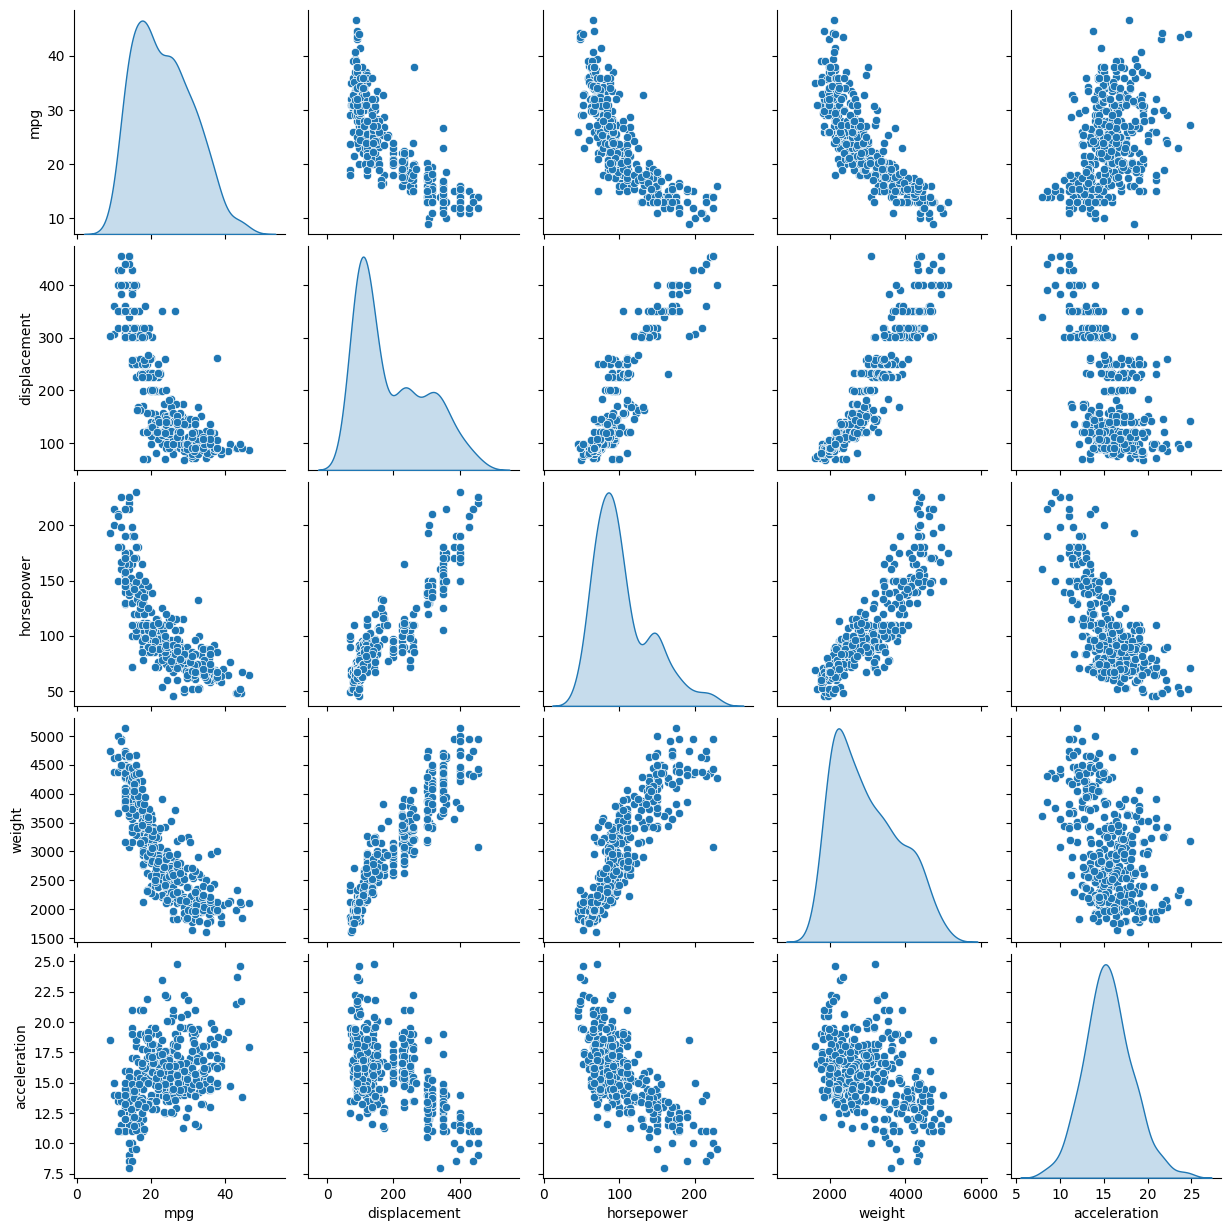

In [89]:

sns.pairplot(quantitative_cols, diag_kind='kde')

**mpg has positive linear relationship with acceleration and negative non-linear relation with all other quantitative variables.**

<Axes: xlabel='cylinders', ylabel='mpg'>

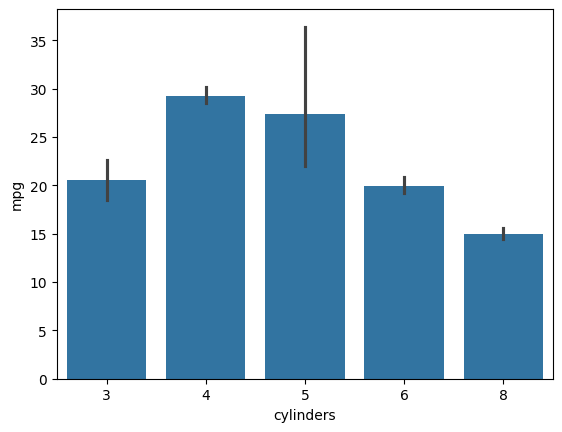

In [90]:
sns.barplot(df,x='cylinders',y='mpg')


cylinder 4 has the highest of mpg and cylinder 8 hass the lowest of mpg

<Axes: xlabel='origin', ylabel='mpg'>

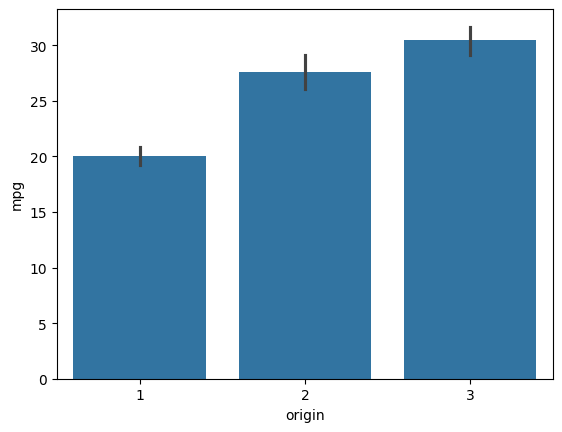

In [91]:
sns.barplot(df,x='origin',y='mpg')

origin 1 has the lowest of mpg 

In [92]:
px.scatter(df,x='weight',y='mpg',color='cylinders',width=800,height=400)

Cylinder number 8 has the highest of weights but the lowest of mpg and  
Cylinder number 4 has the lowest of weights and highest of mpg   

In [93]:
px.scatter(df,x='weight',y='mpg',color='origin',width=800,height=400)

Origin 1 has the highest number of weights and it's more downward sloping (lower value of mpg) than other origins

In [94]:
px.scatter(df,x='displacement',y='mpg',color='origin',width=800,height=400)

Origin 1 has the highest number of displacement and it's more downward sloping (lower value of mpg) than other origins

In [95]:
px.scatter(df,x='displacement',y='mpg',color='cylinders',width=800,height=400)

In [98]:
px.scatter(df,x='horsepower',y='mpg',color='origin',width=800,height=400)

Cylinder number 8 has the highest of displacements but the lowest of mpg and  
Cylinder number 4 has the lowest of displacements and highest of mpg 

**yes, multiple variables are strongly useful for predicting MPG**:

- **Cylinders, Horsepower ,Weight, and Displacement** show very strong negative relationships with MPG – fewer cylinders, lower weight, and smaller displacement all predict higher fuel efficiency.

- **Origin** provides moderate predictive power, revealing regional differences in vehicle efficiency.

- **Acceleration** shows a positive linear relationship with MPG, suggesting it may indicate engine efficiency.

These variables should form the core of your predictive model, though watch for multicollinearity between Cylinders, Weight, and Displacement since they are mechanically related.

# (10)-A

In [99]:
df = pd.read_csv('BostonHousing.csv')

In [102]:
df = df.drop('b',axis=1)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


# (B)

In [103]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset')

There are 506 rows and 13 columns in the dataset


# (C)

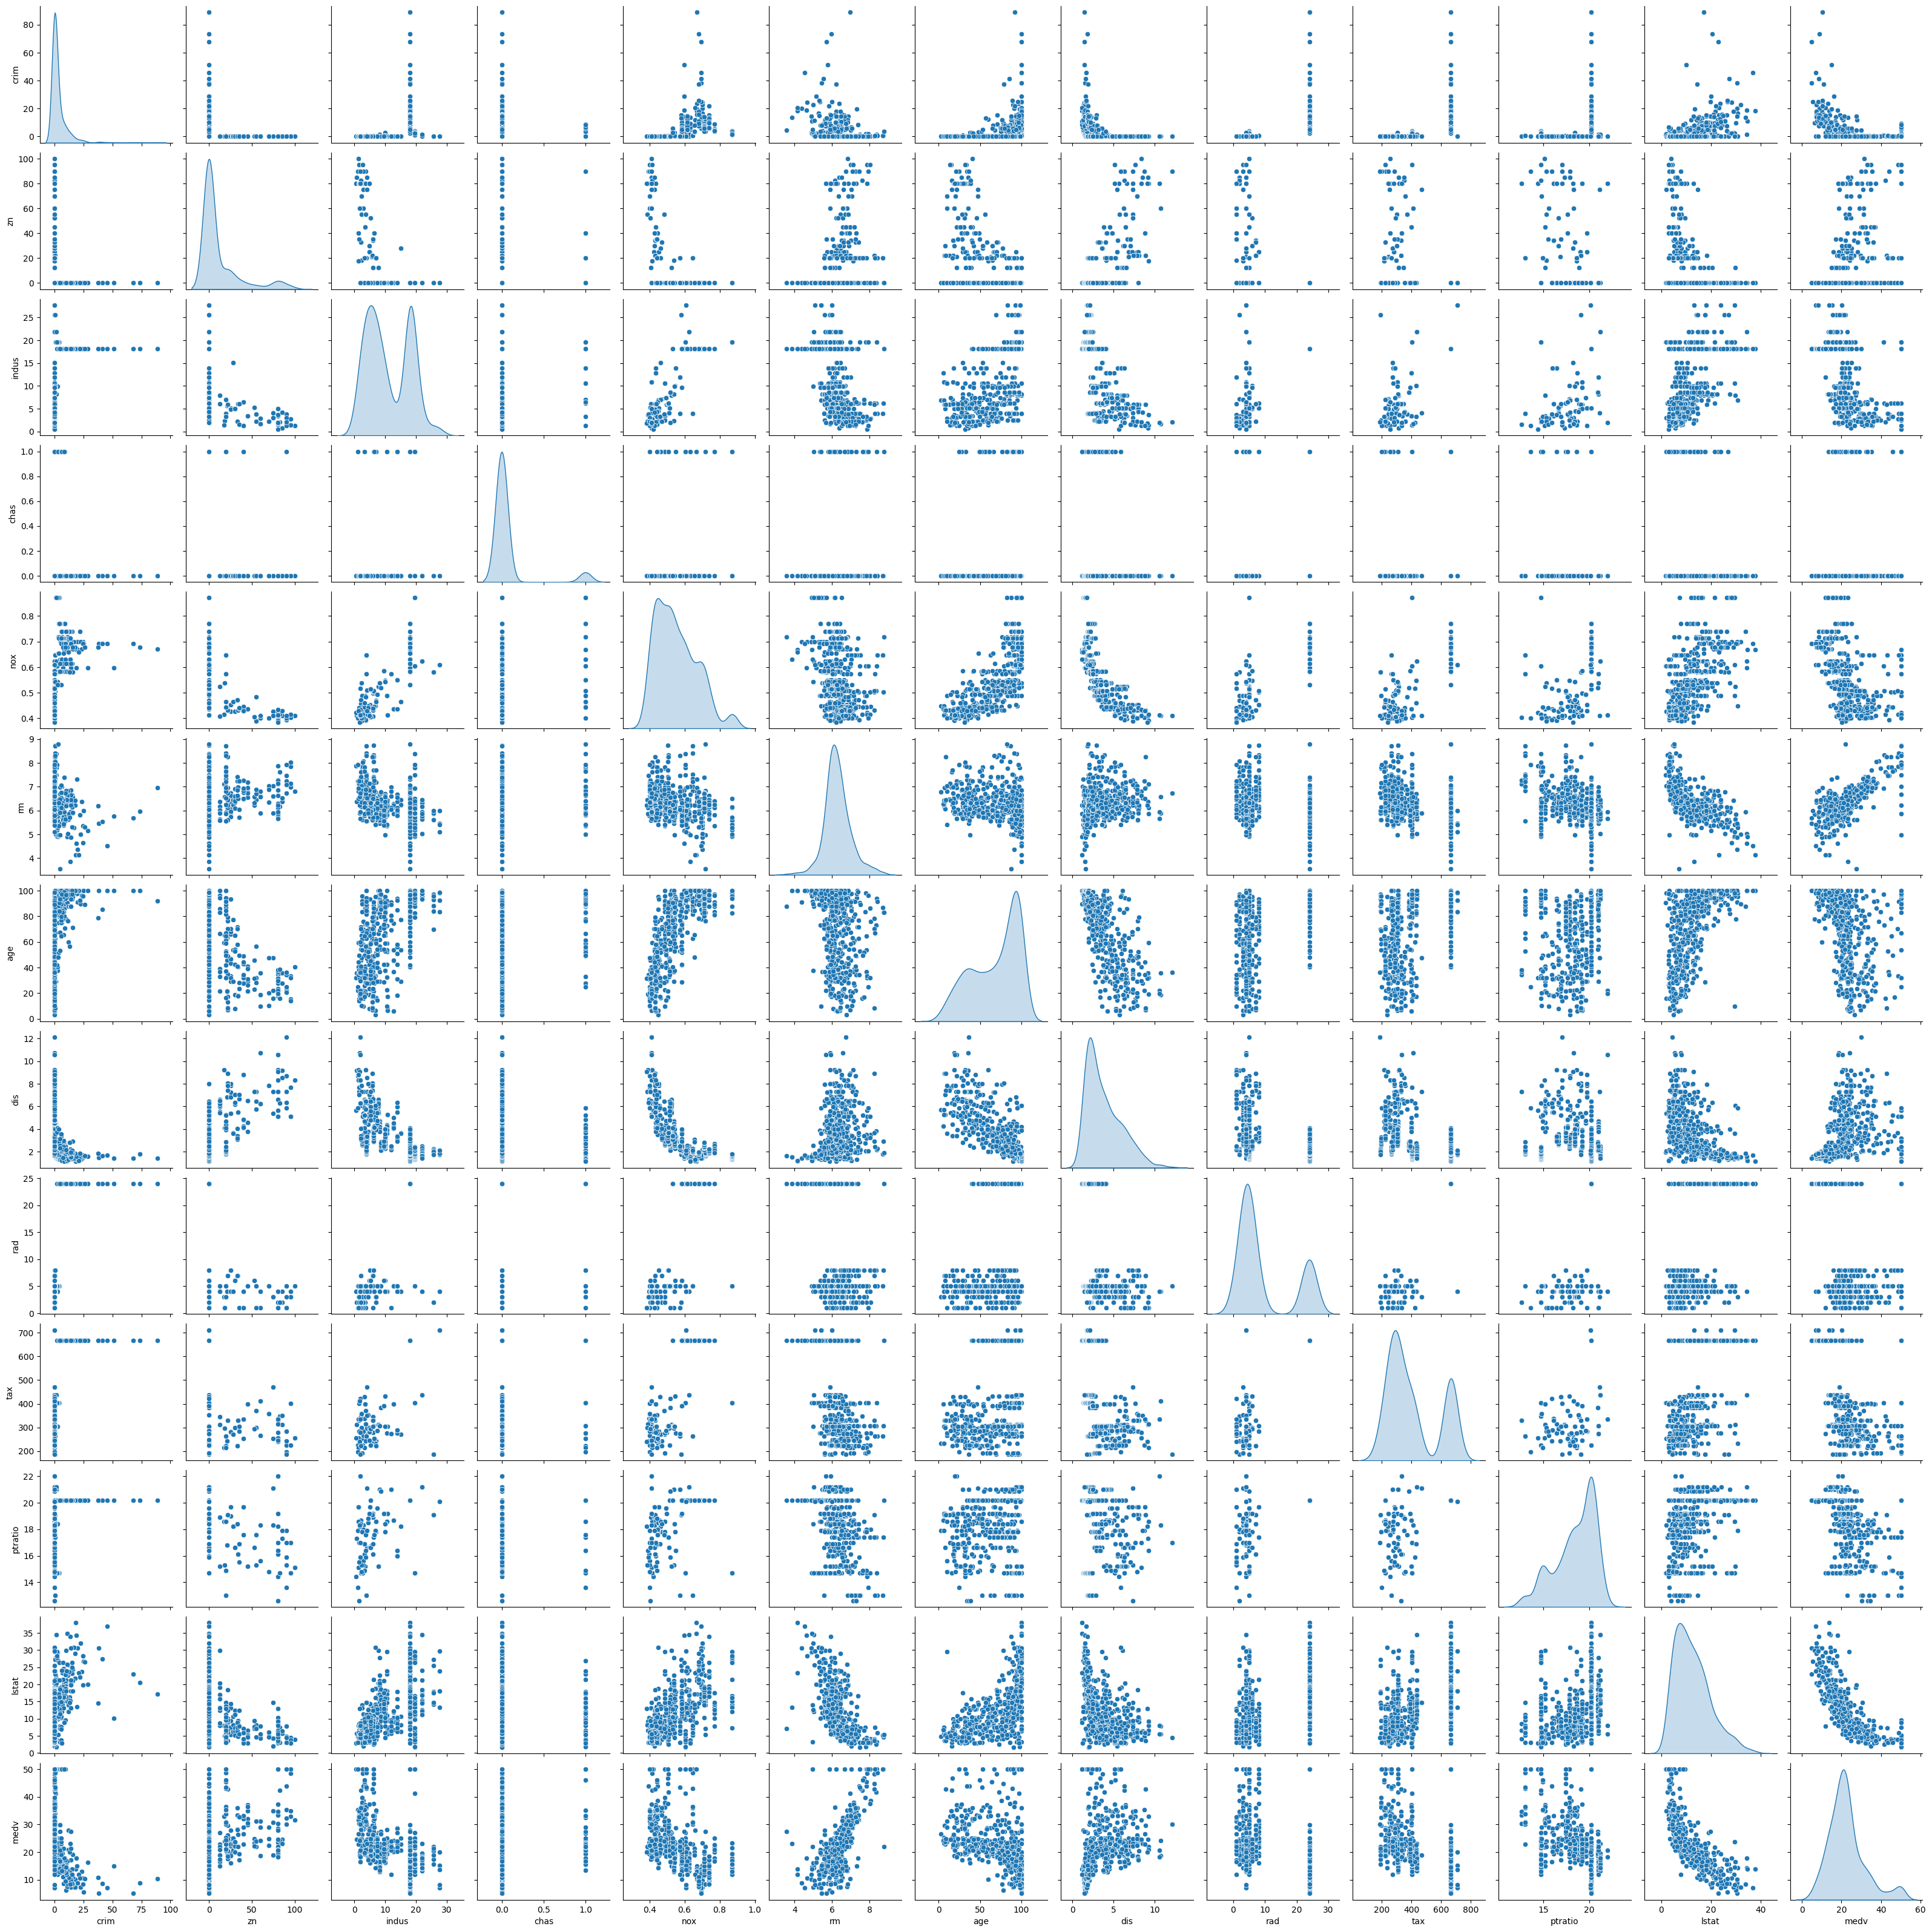

In [104]:
sns.pairplot(df,diag_kind='kde')

# (D)

In [108]:
df.corr()['crim'].sort_values(ascending=False)

crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219247
dis       -0.379670
medv      -0.388305
Name: crim, dtype: float64

# (E)

In [130]:
df.columns[[0,9,10]]

Index(['crim', 'tax', 'ptratio'], dtype='object')

In [135]:
cols = df.columns[[0,9,10]]
for col in cols:
    print(f'min range of {col} : {df.describe()[col]['min']}')
    print(f'max range of {col} : {df.describe()[col]['max']}')
    print('------------------------------------------------')

min range of crim : 0.00632
max range of crim : 88.9762
------------------------------------------------
min range of tax : 187.0
max range of tax : 711.0
------------------------------------------------
min range of ptratio : 12.6
max range of ptratio : 22.0
------------------------------------------------


In [141]:
for col in cols:
    px.box(x=df[col],width=800,height=400,title=f'boxplot of {col}').show()
    

lot's of suburbs appear to have particularly high crime rates

# (f)

In [144]:
print(f'{df['chas'].value_counts()[1]} of the suburbs in this data set bound the Charles river')

35 of the suburbs in this data set bound the Charles river


# (G)

In [148]:
print(f'Median of Pupil Teacher Ratio is : {df['ptratio'].median()}')

Median of Pupil Teacher Ratio is : 19.05


# (H)

In [159]:
print(f'The lowest Median value is {df['medv'].describe()['min']}')
print(f'And The Suburbs are : {list(df[df['medv'] == 5.0].index)}')

The lowest Median value is 5.0
And The Suburbs are : [398, 405]


In [167]:
print(f'other values for those suburbs are :')
df[df['medv'] == 5.0]


other values for those suburbs are :


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0


In [192]:
for col in list(df.columns):
    print(f'Min value of {col} : {df.describe()[col]['min']} & Max value of {col} : {df.describe()[col]['max']}')
    print(f'Value of 398 & 405 are {list(df[df['medv'] == 5.0][col])}')
    print('------------------------------------------------------------------------')

Min value of crim : 0.00632 & Max value of crim : 88.9762
Value of 398 & 405 are [38.3518, 67.9208]
------------------------------------------------------------------------
Min value of zn : 0.0 & Max value of zn : 100.0
Value of 398 & 405 are [0.0, 0.0]
------------------------------------------------------------------------
Min value of indus : 0.46 & Max value of indus : 27.74
Value of 398 & 405 are [18.1, 18.1]
------------------------------------------------------------------------
Min value of chas : 0.0 & Max value of chas : 1.0
Value of 398 & 405 are [0, 0]
------------------------------------------------------------------------
Min value of nox : 0.385 & Max value of nox : 0.871
Value of 398 & 405 are [0.693, 0.693]
------------------------------------------------------------------------
Min value of rm : 3.561 & Max value of rm : 8.78
Value of 398 & 405 are [5.453, 5.683]
------------------------------------------------------------------------
Min value of age : 2.9 & Max val

# (I)

In [197]:
print(f'There are {df[df["rm"] > 7].shape[0]} suburbs with more than 7 rooms') 
print(f'The are {df[df["rm"] > 8].shape[0]} suburbs with more than 8 rooms')

There are 64 suburbs with more than 7 rooms
The are 13 suburbs with more than 8 rooms


In [203]:
df[df["rm"] > 8].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,7.440000,50.000000
